# AdaBoost
弱識別器を連ねることで強識別器を作ることが出来ます。ここでは、弱識別器を連ねるにつれて識別境界が次第に複雑に（非線形に）なっていく様子を観察します。

まず準備です。

In [81]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def paint_classified_area(ax, clf, X, t, nx=100, ny=100, margin=0.1):
    x_min, x_max = (1 + margin) * X[:,0].min() - margin * X[:,0].max(), (1 + margin) * X[:,0].max() - margin * X[:,0].min()
    y_min, y_max = (1 + margin) * X[:,1].min() - margin * X[:,1].max(), (1 + margin) * X[:,1].max() - margin * X[:,1].min()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = (clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.1, colors=colors)

# style
colors = ['#e74c3c', '#3498db', '#1abc9c', '#9b59b6', '#f1c40f'] # red, blue, green, purple, yellow
cmap = ListedColormap(colors)
plt.style.use('seaborn')

# 三日月状に分布するデータの読み込み。Xがデータでyがクラスラベルラベル
X, y = make_moons(n_samples=100, noise=0.25, random_state=0)

読み込んだデータを図示します。

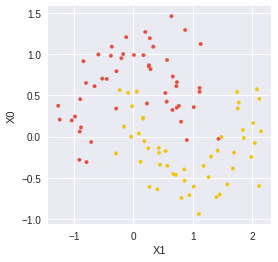

In [53]:
# 図示します。
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')
plt.ylabel('X0')
plt.xlabel('X1')

plt.show()

AdaBoostを読み込んだデータに適用します。弱識別器は深さ1の決定木です。識別器の数をを1, 2, 4と変化させたときの境界の変化を観察してみましょう。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


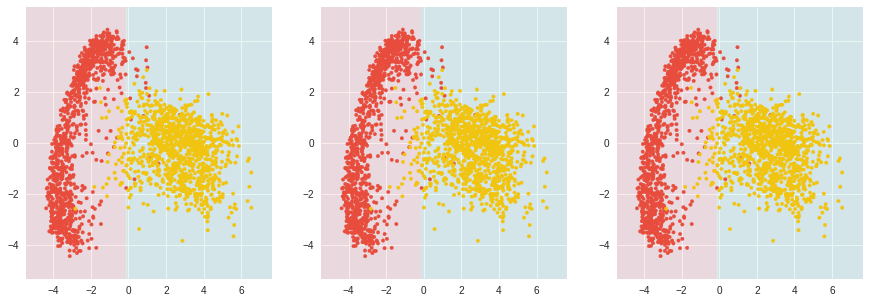

In [87]:
from sklearn.ensemble import AdaBoostClassifier
fig, ax = plt.subplots(1,3, figsize = (15, 5))
clf = AdaBoostClassifier(n_estimators=1, random_state=0, algorithm='SAMME')
clf.fit(X, y)
paint_classified_area(ax[0], clf, X, y )
ax[0].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=2, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[1], clf, X, y )
ax[1].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[2], clf, X, y )
ax[2].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

さらに識別器を増やします。たとえば、10, 20, 40と増やしてみましょう。何個のときが良いかの評価が別途必要そうなことが分かります。


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


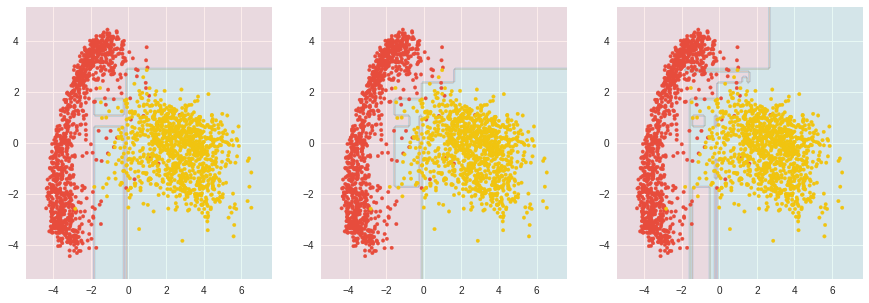

In [88]:
fig, ax = plt.subplots(1,3, figsize = (15, 5))

clf = AdaBoostClassifier(n_estimators=10, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[0], clf, X, y )
ax[0].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=20, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[1], clf, X, y )
ax[1].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=40, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[2], clf, X, y )
ax[2].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

手書き数字のデータを低次元に射影したデータで同種の実験をしてみましょう。

In [89]:
import tensorflow as tf
from sklearn.decomposition import PCA

DNUM = 1024

# Load MNIST
mnist = tf.keras.datasets.mnist.load_data()
train, test = mnist
(x_train, y_train),(x_test, y_test) = mnist


#注目する数字 2種類 (7と9が難しい)
TARGET_0 = 1 # Input HERE
TARGET_1 = 9 # Input HERE

# TARGET_0
X0_all = x_train[y_train == TARGET_0, :, :]
X0 = X0_all[0:DNUM,:,:].reshape(DNUM,28*28)
X0 = X0 /255.0

# TARGET_1
X1_all = x_train[y_train == TARGET_1, :, :]
X1 = X1_all[0:DNUM,:,:].reshape(DNUM,28*28)
X1 = X1 /255.0

# Concatenate TARGET_0 and TARGET_1
X = np.concatenate( (X0, X1 ), axis=0)

# Apply PCA to the concatenated data.
D = 2
pca = PCA(n_components=D)
pca.fit(X)
X = pca.transform(X)

# Concatenate the laberl data
label0 = np.array([[TARGET_0]]* DNUM)
label1 = np.array([[TARGET_1]]* DNUM)
y = np.concatenate((label0, label1), axis=0)
# Xd = np.concatenate((Xd, label), axis = 1 )

例えば識別器の数をを1, 2, 4と増やしてみましょう。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


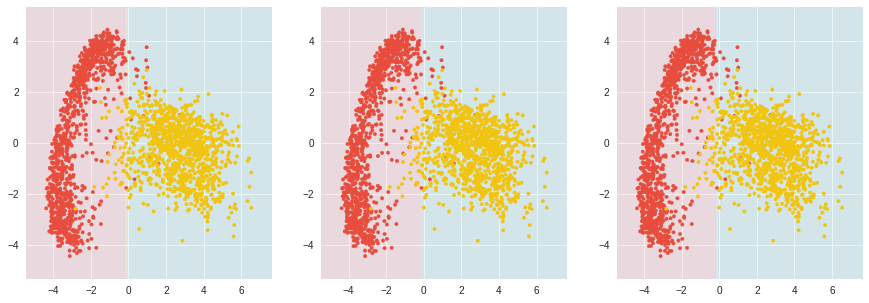

In [90]:
from sklearn.ensemble import AdaBoostClassifier
fig, ax = plt.subplots(1,3, figsize = (15, 5))
clf = AdaBoostClassifier(n_estimators=1, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[0], clf, X, y )
ax[0].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=2, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[1], clf, X, y )
ax[1].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[2], clf, X, y )
ax[2].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

さらにさらに10, 20, 40と増やしてみましょう。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


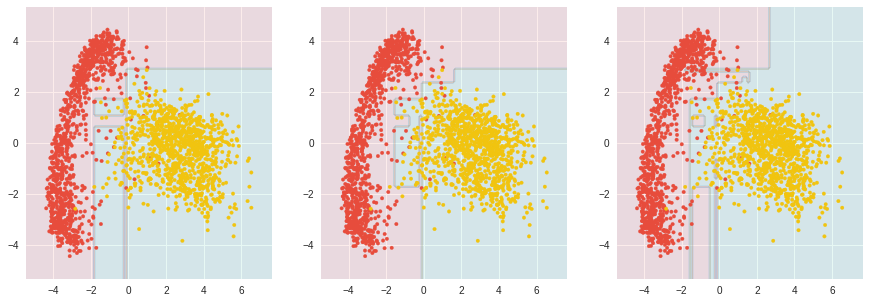

In [91]:
fig, ax = plt.subplots(1,3, figsize = (15, 5))

clf = AdaBoostClassifier(n_estimators=10, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[0], clf, X, y )
ax[0].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=20, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[1], clf, X, y )
ax[1].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

clf = AdaBoostClassifier(n_estimators=40, random_state=0)
clf.fit(X, y)
paint_classified_area(ax[2], clf, X, y )
ax[2].scatter(X[:,0], X[:,1], c=y, cmap=cmap, marker='.')

AdaBoostでは弱識別を作る際に、各データの「重み」を更新します。誤識別するデータの重みを大きくします。以下では、データの重みの変化を観察します。

まず準備です。

In [94]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
sns.set_style('white')

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Toy Dataset
x1 = np.array([.1,.2,.4,.8, .8, .05,.08,.12,.33,.55,.66,.77,.88,.2,.3,.4,.5,.6,.25,.3,.5,.7,.6])
x2 = np.array([.2,.65,.7,.6, .3,.1,.4,.66,.77,.65,.68,.55,.44,.1,.3,.4,.3,.15,.15,.5,.55,.2,.4])
y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
X = np.vstack((x1,x2)).T

def plot_decision_boundary(classifier, X, y, N = 50, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list
def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

今回使うのは赤の周囲に青が取り巻くような、シンプルな分布です。識別器を50個連ねています。

Accuracy =  1.0


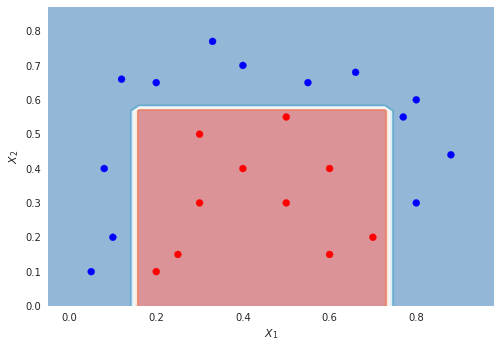

In [96]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=10, learning_rate = 1)
plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

上記識別器を構築する際のデータの重みの変化を可視化してみましょう。単に実行してください。点の半径が重みを表しています。直前までの識別器で誤識別されるデータの半径が大きいことが分かります。

Accuracy =  1.0


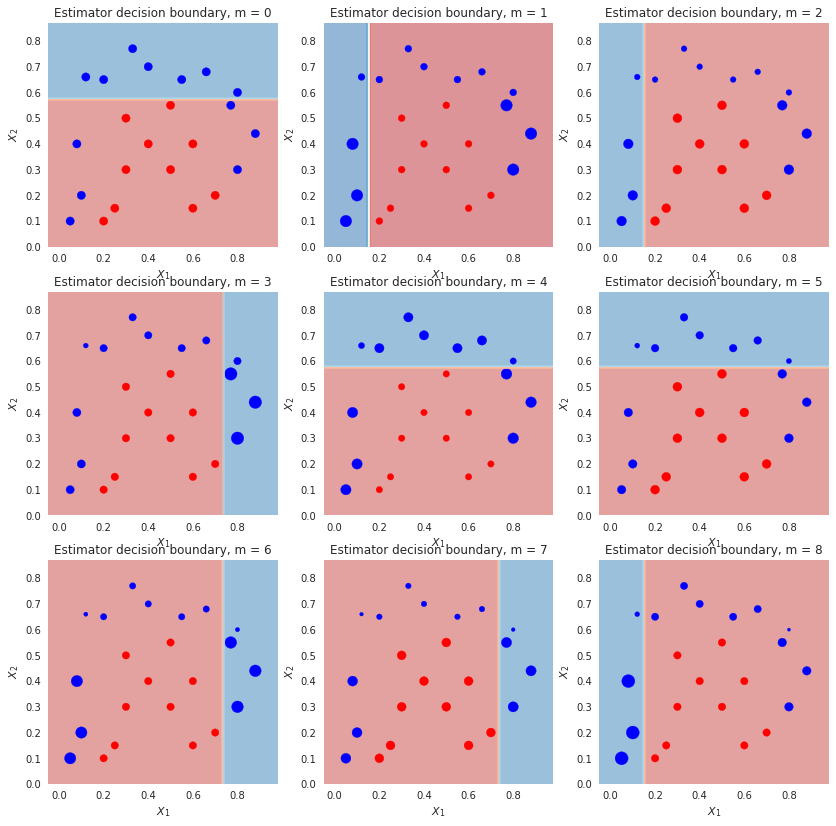

In [97]:
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=10, learning_rate = 1)

fig = plt.figure(figsize = (14,14))
for m in range(0,9):
    fig.add_subplot(3,3,m+1)
    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 40
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights )
    plt.title('Estimator decision boundary, m = {}'.format(m))